In [22]:
import pickle

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.cluster import KElbowVisualizer

In [23]:
# Load data

# keywords set
with open("./MJ_data.pickle", "rb") as fr:
    MJ_data = pickle.load(fr)

 # news summarize (sentences)
all_sentences = pd.read_csv('./Dataset/NewsSentence_2.csv')

MJ_sentences = all_sentences[all_sentences['date'] >= 20200501]
MJ_sentences = MJ_sentences[MJ_sentences['sentences'] != '']

MJ_all = pd.concat([MJ_data, MJ_sentences.iloc[:, 2]], axis=1)
MJ_all.drop(['keywords'], axis=1, inplace=True)
MJ_all.reset_index(drop=False, inplace=True)
MJ_all.shape

(7172, 6)

In [3]:
# => '5~6월 카테고리: covid19, 검찰, 국회'로 결정
#   선택 키워드: covid19) covid19, 검찰) 검찰, 국회) '국회'로 지정하여 추출

In [7]:
MJ_all.head(2)

index      date      category                               title  \
0  14189  20200501  popular/news    김정은 첫째아들은 고작 10살, BBC는 이 세사람 찍었다   
1  14190  20200501  popular/news  부모가 내 건보 얹혀있어도, 주소 다르면 재난지원금 각각 받아   

                                  keywords_list              sentences  
0   [북한, 위원장, 후계자, 집권, 최룡해, 추측, 건강, 누가, 체제, 주요]      우선 김 위원장의 자녀들이 있다  
1  [신청, 재난지원금, 국민, 지원금, 지급, 카드, 가구, 예정, 보험, 건강]  Q  신청을 따로 안 하면 어떻게 되나

In [24]:
# 키워드셋에 맞는 데이터 추출

def categories_data(month_data, keyword_list):
    result = []
    for index in range(len(month_data)):
        if set(keyword_list).issubset(month_data['keywords_list'][index]):
            select_dict = {}
            select_dict['title'] = month_data['title'][index]
            select_dict['keywords'] = month_data['keywords_list'][index]
            select_dict['sentence'] = month_data['sentences'][index]

            result.append(select_dict)

    result = pd.DataFrame(result)
    return result

In [25]:
covid19_news = categories_data(MJ_all, ['covid19'])
prosc_news = categories_data(MJ_all, ['검찰'])
capit_news = categories_data(MJ_all, ['국회'])

In [26]:
print('covid19 카테고리 데이터 개수: ', covid19_news.shape)
print('검찰 카테고리 데이터 개수: ', prosc_news.shape)
print('국회 카테고리 데이터 개수: ', capit_news.shape)

covid19 카테고리 데이터 개수:  (810, 3)
검찰 카테고리 데이터 개수:  (383, 3)
국회 카테고리 데이터 개수:  (370, 3)


In [27]:
# Save pickle

with open("./Dataset/covid19_MJ.pickle","wb") as fw:
    pickle.dump(covid19_news, fw)
    
with open("./Dataset/prosc_MJ.pickle","wb") as fw:
    pickle.dump(prosc_news, fw)
    
with open("./Dataset/capit_MJ.pickle","wb") as fw:
    pickle.dump(capit_news, fw)

In [28]:
with open("./Dataset/covid19_MJ.pickle", "rb") as fr:
    covid19_MJ = pickle.load(fr)
    
covid19_MJ.head(2)

title  \
0   "대구 사람이라면 치가 떨린다" 코로나보다 무서운 지역 혐오   
1  [종합]"반성부터 하라" 코로나19 성과 '자찬' 권영진 뭇매   

                                           keywords  \
0  [대구, 경북, 지역, covid19, 여론, 온라인, 혐오, 인터넷, 지역민, 확산]   
1    [대구, covid19, 대구시, 연대, 비판, 확진, 지역, 본부, 사태, 거리]   

                                            sentence  
0           1일 0시 기준 대구 지역 <COVID19> 누적 확진자 수는 6852명  
1  또한 뼈를 깎는 반성으로 하반기 도래할 대유행을 제대로, 투명하게 준비할 것을 촉구...

### [문장 군집화 진행]

In [13]:
tfidf_vect = TfidfVectorizer()
fit_vec = tfidf_vect.fit_transform(covid19_news['sentence'])

kmeans = KMeans(n_clusters=5, max_iter=1000, random_state=2)
cluster_label = kmeans.fit_predict(fit_vec)

In [11]:
covid19_news.iloc[np.where(cluster_label == 0)[0],1]

46      [혈액, covid19, 개발, 샘플, 바이오, 커넥트, 젠킨스, 영국, 달러, 백신]
54        [연준, 시장, 달러, 미국, covid19, 기업, 재무, 유동, 회사채, 투자]
59      [혈액, covid19, 개발, 샘플, 바이오, 커넥트, 젠킨스, 영국, 달러, 백신]
64      [대통령, covid19, 풀리, 실험실, 검사, 국립, 외국, 지시, 은폐, 신뢰도]
79       [마스크, 착용, 여성, 구멍, 마트, 계산원, 손님, 미국, 감염, covid19]
97       [마스크, 착용, 여성, 구멍, 마트, 계산원, 손님, 미국, 감염, covid19]
108       [마스크, 방역, 착용, 감염, 사람, 경우, 지침, covid19, 보건, 환자]
131       [페루, covid19, 장관, 미국, 경기, 부양, 지원, 알바, 연구소, 병상]
152    [어버이날, 공휴일, 지정, 국민, 당시, 의견, 휴일, 청와대, 무산, covid19]
178      [총선, 추진, 대통령, 직후, 지지율, 취임, 결과, 과제, 정부, covid19]
193     [오바마, 대통령, 공개, 통화, covid19, 관련, 상황, 개인, 부통령, 중요]
211    [본부, 요미우리, covid19, 한국, 질병관리본부, 감염, 회견, 집단, 소개...
216     [covid19, 검사, 소수자, 클럽, 교수, 방역, 한국, 감염, 이태원, 신천지]
221     [오바마, 대통령, 트럼프, 미국, covid19, 플린, 국가, 대응, 점수, 재앙]
228     [covid19, 검사, 소수자, 클럽, 교수, 방역, 한국, 감염, 이태원, 신천지]
230    [본부, 요미우리, covid19, 한국, 질병관리본부, 감염, 회견, 집단, 소개...
233    [가맹점, 로페이, 결제, 이사장, 사용, 과정, covid19, 소비자, 코드, 카드]
242     [상담, 임신, 관련, 문의, 영향, 생명

/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f189430dee0>,
                 k=None, model=None)

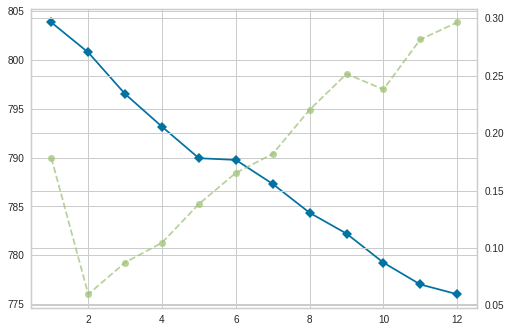

In [16]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vec)

/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)
/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f1894158d00>,
                 k=None, model=None)

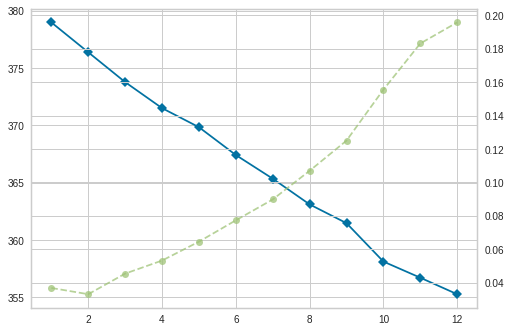

In [17]:
fit_vec = tfidf_vect.fit_transform(prosc_news['sentence'])
visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vec)

/home/yooso/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f18995cc4c0>,
                 k=None, model=None)

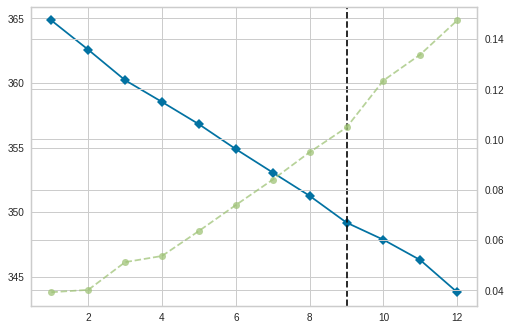

In [21]:
capit_news = capit_news.dropna()
fit_vec = tfidf_vect.fit_transform(capit_news['sentence'])
visualizer = KElbowVisualizer(model, k=(1,13))
visualizer.fit(fit_vec)